### Importing libraries

In [1]:

import numpy as np 
import pandas as pd 


from matplotlib import pyplot as plt 
import seaborn as sns

sns.set() 
%matplotlib inline 

### First we read the data.  

In [7]:
data = pd.read_csv("../../data/kickstarter.csv")

### Feature Transformations

Let's repeat feature transformations we performed in Level 1.

In [12]:
data['launched'] = pd.to_datetime(data['launched'], format='%Y-%m-%d %H:%M:%S')
data['deadline'] = pd.to_datetime(data['deadline'], format='%Y-%m-%d')
data['campaign_duration'] = data['deadline'] - data['launched']

In [13]:
data['campaign_duration_days'] = data['campaign_duration'].dt.days

In [14]:
data.head()

,Unnamed: 0,ID,name,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,campaign_duration,campaign_duration_days
0,0,239894312,Barwagen,Crafts,CHF,2017-11-30,500.0,2017-10-23 19:32:00,15.0,failed,2.0,CH,0.00,37 days 04:28:00,37
1,1,353169821,StrongMACH Customs muscle car replicas,Art,USD,2016-10-03,100000.0,2016-08-04 18:29:00,0.0,failed,0.0,US,0.00,59 days 05:31:00,59
2,2,1387928487,Cravin' Dogs 30th anniversary CD project,Music,USD,2016-10-27,12500.0,2016-09-27 16:40:00,1180.0,failed,18.0,US,531.00,29 days 07:20:00,29
3,3,735160267,A Socially Awkward fundraiser!,Theater,GBP,2017-09-14,1500.0,2017-07-16 16:33:00,1500.0,successful,42.0,GB,144.05,59 days 07:27:00,59
4,4,1838469271,MechRunner,Games,USD,2014-05-17,25000.0,2014-04-13 20:57:00,28434.0,successful,574.0,US,28434.00,33 days 03:03:00,33


### Visualizations

Visualizations are very powerful means of exploration!

----- ELENA: refine from here -------

Boxplot of goal, pledged and bakers.

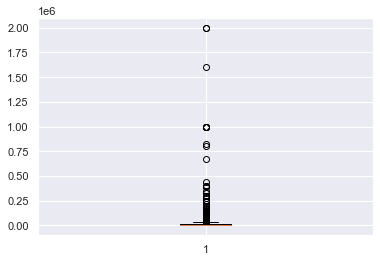

In [37]:
plt.boxplot(data.goal);

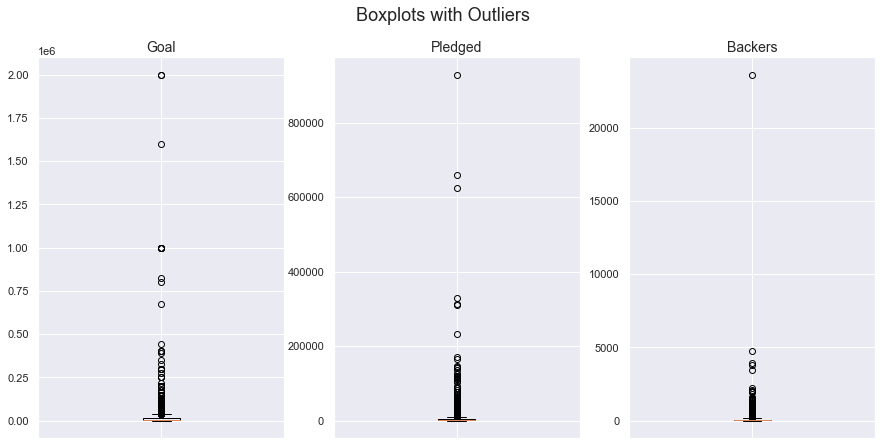

In [38]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=[15,7])
plt.suptitle('Boxplots with Outliers', fontsize=18)

#Row1
ax[0].boxplot(data.goal)
ax[0].set_title('Goal', loc='center', fontsize=14)
ax[0].set_xticklabels('')

#Row2
ax[1].boxplot(data.pledged)
ax[1].set_title('Pledged', loc='center', fontsize=14)
ax[1].set_xticklabels('')

#Row13
ax[2].boxplot(data.backers)
ax[2].set_title('Backers', loc='center', fontsize=14)
ax[2].set_xticklabels('');

In [39]:
mask = (data.goal < 20000) & (data.backers < 100) & (data.pledged < 7000)

In [40]:
new_data = data[mask]

Text(0.5, 1.0, 'Backers')

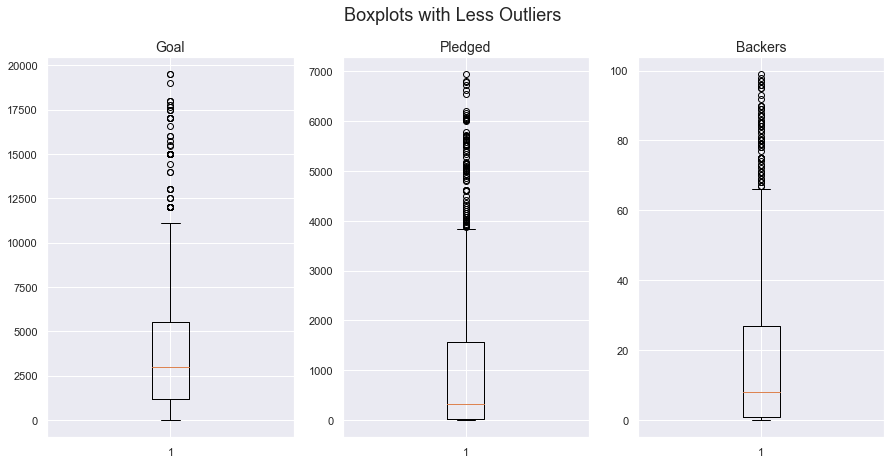

In [41]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=[15,7])
plt.suptitle('Boxplots with Less Outliers', fontsize=18)

#Row1
ax[0].boxplot(new_data.goal)
ax[0].set_title('Goal', loc='center', fontsize=14)
#ax[0].set_xticklabels('')

#Row2
ax[1].boxplot(new_data.pledged)
ax[1].set_title('Pledged', loc='center', fontsize=14)
#ax[1].set_xticklabels('')

#Row13
ax[2].boxplot(new_data.backers)
ax[2].set_title('Backers', loc='center', fontsize=14)
#ax[2].set_xticklabels('');

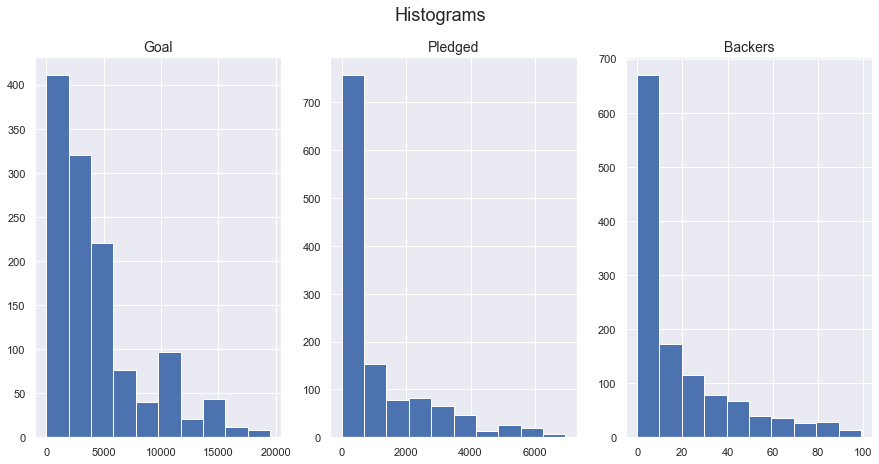

In [42]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=[15,7])
plt.suptitle('Histograms', fontsize=18)

#Row1
ax[0].hist(new_data.goal)
ax[0].set_title('Goal', loc='center', fontsize=14)


#Row2
ax[1].hist(new_data.pledged)
ax[1].set_title('Pledged', loc='center', fontsize=14)


#Row13
ax[2].hist(new_data.backers)
ax[2].set_title('Backers', loc='center', fontsize=14);

In [43]:
summary = data.groupby(['main_category'])[['ID', 'goal']].agg({'ID':'count',
                                                    'goal':'mean'}).sort_values(by='goal', ascending=True)

In [44]:
summary_1 = data.groupby(['state'])[['ID', 'goal']].agg({'ID':'count',
                                                    'goal':'mean'}).sort_values(by='goal', ascending=True)

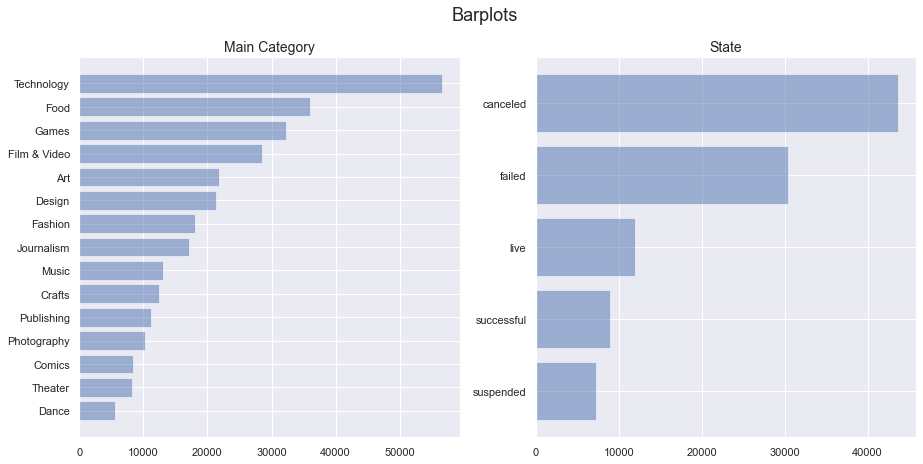

In [45]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=[15,7])
plt.suptitle('Barplots', fontsize=18)

#Row1
ax[0].barh(summary.index, summary.goal , alpha=.5)
ax[0].set_title('Main Category', loc='center', fontsize=14)


#Row1
ax[1].barh(summary_1.index, summary_1.goal, alpha=.5)
ax[1].set_title('State', loc='center', fontsize=14);

Let's look at relationship of variables 

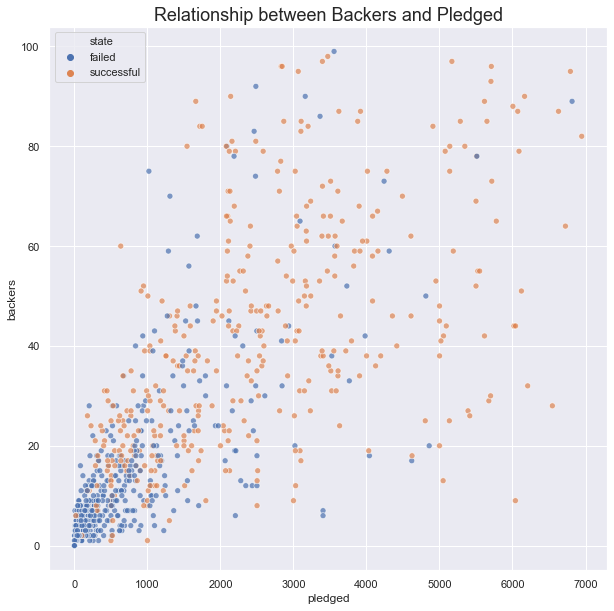

In [46]:
plt.figure(figsize=[10,10])
sns.scatterplot(x='pledged', 
                y='backers', 
                hue='state', 
                data=new_data[(new_data['state'] == 'successful') | (new_data['state'] == 'failed')],
                alpha=.7)
plt.title('Relationship between Backers and Pledged', loc='center', fontsize=18);

In [47]:
new_data_log = new_data[(new_data['state'] == 'successful') | (new_data['state'] == 'failed')]
#new_data_log.loc[:,'backers_log'] = np.log(new_data_log['backers'])

new_data_log.backers = new_data_log.backers.apply(lambda x:  np.log(x))
new_data_log.pledged = new_data_log.pledged.apply(lambda x:  np.log(x))
new_data_log.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,campaign_duration,campaign_duration_days
0,1,239894312,Barwagen,Woodworking,Crafts,CHF,2017-11-30,500.0,2017-10-23 19:32:00,2.708050,failed,0.693147,CH,0.00,37 days 04:28:00,37
2,3,1387928487,Cravin' Dogs 30th anniversary CD project,Rock,Music,USD,2016-10-27,12500.0,2016-09-27 16:40:00,7.073270,failed,2.890372,US,531.00,29 days 07:20:00,29
3,4,735160267,A Socially Awkward fundraiser!,Plays,Theater,GBP,2017-09-14,1500.0,2017-07-16 16:33:00,7.313220,successful,3.737670,GB,144.05,59 days 07:27:00,59
5,6,1001979324,Capturing the Soul of a Town,Documentary,Film & Video,USD,2017-11-30,10000.0,2017-10-21 00:00:00,7.984463,failed,3.784190,US,336.00,40 days 00:00:00,40
7,8,178870581,The WET Book,Photography,Photography,USD,2012-06-17,16000.0,2012-05-18 02:42:00,8.013012,failed,2.995732,US,3020.00,29 days 21:18:00,29


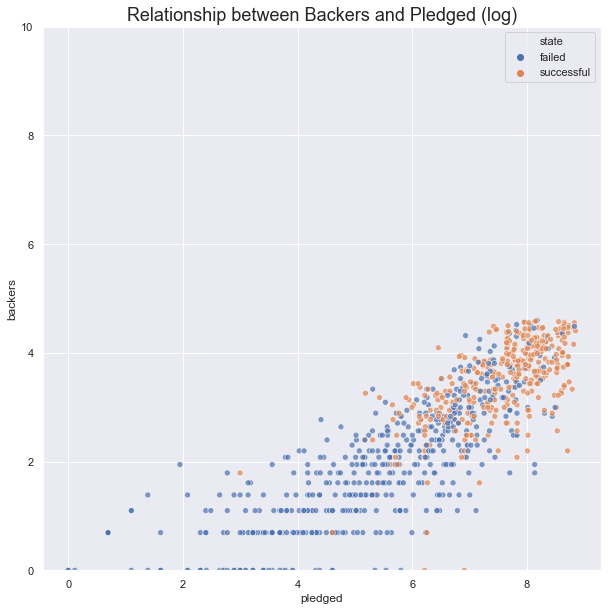

In [48]:
plt.figure(figsize=[10,10])
sns.scatterplot(x='pledged', 
                y='backers', 
                hue='state', 
                data=new_data_log,
                alpha=.7)
plt.title('Relationship between Backers and Pledged (log)', loc='center', fontsize=18)
plt.ylim(0, 10);

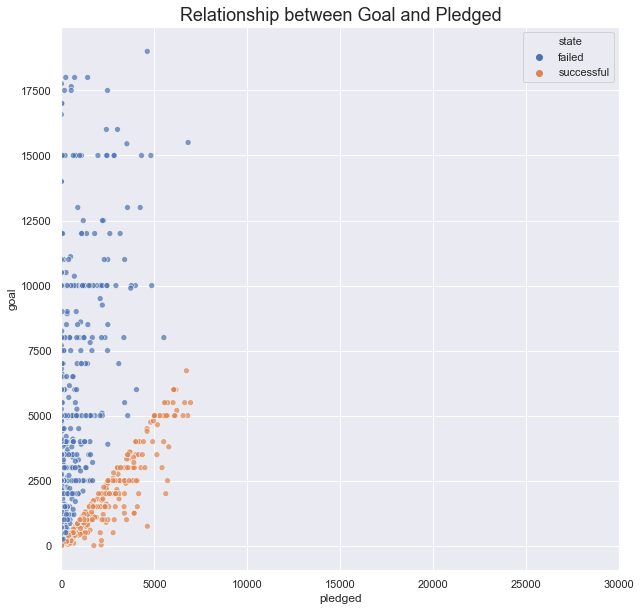

In [49]:
plt.figure(figsize=[10,10])
sns.scatterplot(x='pledged', 
                y='goal', 
                hue='state', 
                data=new_data[(new_data['state'] == 'successful') | (new_data['state'] == 'failed')],
                alpha=.7)
plt.title('Relationship between Goal and Pledged', loc='center', fontsize=18)
plt.xlim(0, 30000);

In [50]:
new_data.columns

Index(['Unnamed: 0', 'ID', 'name', 'category', 'main_category', 'currency',
       'deadline', 'goal', 'launched', 'pledged', 'state', 'backers',
       'country', 'usd.pledged', 'campaign_duration',
       'campaign_duration_days'],
      dtype='object')

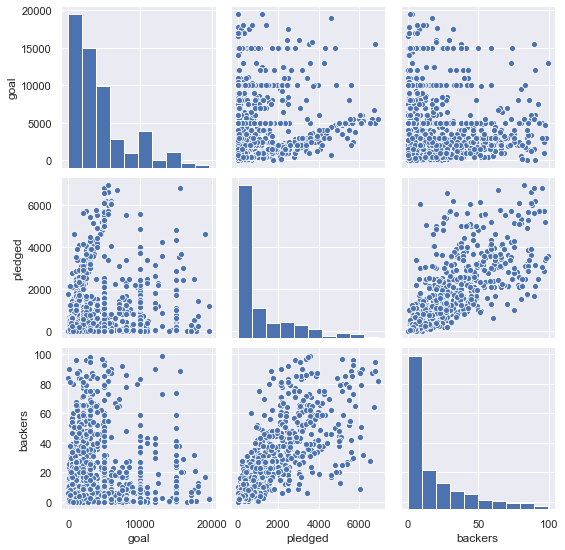

In [51]:
sns.pairplot(new_data[['goal', 'launched', 'pledged','backers']]);

In [52]:
new_data.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,campaign_duration,campaign_duration_days
0,1,239894312,Barwagen,Woodworking,Crafts,CHF,2017-11-30,500.0,2017-10-23 19:32:00,15.0,failed,2,CH,0.00,37 days 04:28:00,37
2,3,1387928487,Cravin' Dogs 30th anniversary CD project,Rock,Music,USD,2016-10-27,12500.0,2016-09-27 16:40:00,1180.0,failed,18,US,531.00,29 days 07:20:00,29
3,4,735160267,A Socially Awkward fundraiser!,Plays,Theater,GBP,2017-09-14,1500.0,2017-07-16 16:33:00,1500.0,successful,42,GB,144.05,59 days 07:27:00,59
5,6,1001979324,Capturing the Soul of a Town,Documentary,Film & Video,USD,2017-11-30,10000.0,2017-10-21 00:00:00,2935.0,failed,44,US,336.00,40 days 00:00:00,40
7,8,178870581,The WET Book,Photography,Photography,USD,2012-06-17,16000.0,2012-05-18 02:42:00,3020.0,failed,20,US,3020.00,29 days 21:18:00,29
